# Project

In [39]:
import numpy as np
import scipy.stats as sc
import networkx as nx
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import collections
sns.set()

In [45]:
def print_degree_dist(G,lin,log):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence) # degree count
    print("Empirical Degree Distribution for network: "+G.name)
    if lin:
        nx_hist(degree_sequence,len(degreeCount))
    if log:
        nx_hist(degree_sequence,len(degreeCount),yscale='log') 
    #nx_hist(degree_sequence,len(degreeCount),yscale='log',use_log=True) 
    
def nx_hist(x, bins, normed = False, xscale = 'linear', yscale = 'linear', use_log = False, title = None, xlabel = 'Degree', ylabel = 'Count'): 
    density = None
    if(normed):
        density = 1
        ylabel = 'Probability'
    fig = plt.figure(figsize=(15,6))
    plt.hist(x, bins=bins, normed=density, log=use_log)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #plt.xscale(yscale)
    plt.yscale(yscale)
    plt.title(title)
    plt.grid(True)
    plt.show()

In [13]:
users = pd.read_csv('filtered_users.csv')
relations = pd.read_csv('filtered_relations.csv')
days = relations.day.unique()

In [14]:
relations.head(10)

,day,time_ms,src,dst,relation
0,0,7857852,1,3993630,5
1,0,7860977,1,3181660,5
2,0,7862420,1,1582548,5
3,0,7866986,1,5208994,5
4,2,21455967,1,2330216,5
5,2,21472493,1,4483813,5
6,2,21475362,1,4921394,5
7,3,26385447,1,4966471,5
8,3,26386914,1,4242568,5
9,3,26390396,1,1035238,5


## All data is over 10 days

In [15]:
days

array([0, 2, 3, 4, 5, 6, 7, 9, 1, 8])

In [16]:
DayNetworks = [relations[relations.day == k] for k in days]

In [20]:
[print(d.shape) for d in DayNetworks]

(3294, 5)
(5459, 5)
(7010, 5)
(9860, 5)
(10635, 5)
(13761, 5)
(11339, 5)
(10260, 5)
(3596, 5)
(7962, 5)


[None, None, None, None, None, None, None, None, None, None]

## network for all days

In [48]:
T = nx.from_pandas_edgelist(relations, 'src', 'dst', ['time_ms'])
T_GCC = max(nx.connected_component_subgraphs(T), key=len)
print(nx.info(T_GCC))

Name: 
Type: Graph
Number of nodes: 62173
Number of edges: 66919
Average degree:   2.1527


## This looks weird

Empirical Degree Distribution for network: 


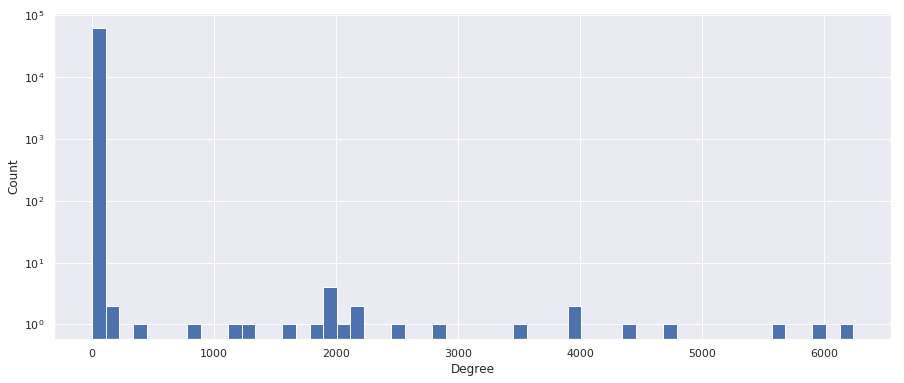

In [49]:
print_degree_dist(T,0,1)

# time network for each day

In [29]:
G = [nx.from_pandas_edgelist(D, 'src', 'dst', ['time_ms']) for D in DayNetworks]

In [30]:
G_GCC = [max(nx.connected_component_subgraphs(g), key=len) for g in G]

In [31]:
[print(nx.info(g)) for g in G_GCC]

Name: 
Type: Graph
Number of nodes: 2614
Number of edges: 2713
Average degree:   2.0757
Name: 
Type: Graph
Number of nodes: 4541
Number of edges: 4657
Average degree:   2.0511
Name: 
Type: Graph
Number of nodes: 6116
Number of edges: 6212
Average degree:   2.0314
Name: 
Type: Graph
Number of nodes: 8823
Number of edges: 8933
Average degree:   2.0249
Name: 
Type: Graph
Number of nodes: 9116
Number of edges: 9220
Average degree:   2.0228
Name: 
Type: Graph
Number of nodes: 12108
Number of edges: 12308
Average degree:   2.0330
Name: 
Type: Graph
Number of nodes: 10061
Number of edges: 10132
Average degree:   2.0141
Name: 
Type: Graph
Number of nodes: 8920
Number of edges: 8948
Average degree:   2.0063
Name: 
Type: Graph
Number of nodes: 3036
Number of edges: 3094
Average degree:   2.0382
Name: 
Type: Graph
Number of nodes: 6952
Number of edges: 6972
Average degree:   2.0058


[None, None, None, None, None, None, None, None, None, None]

Empirical Degree Distribution for network: 


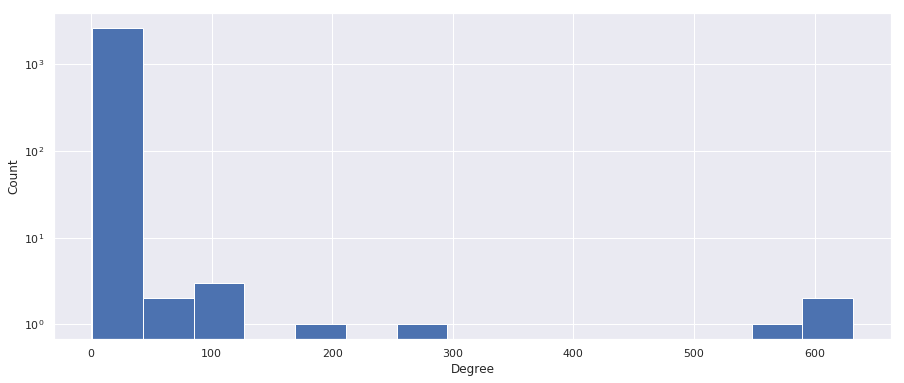

Empirical Degree Distribution for network: 


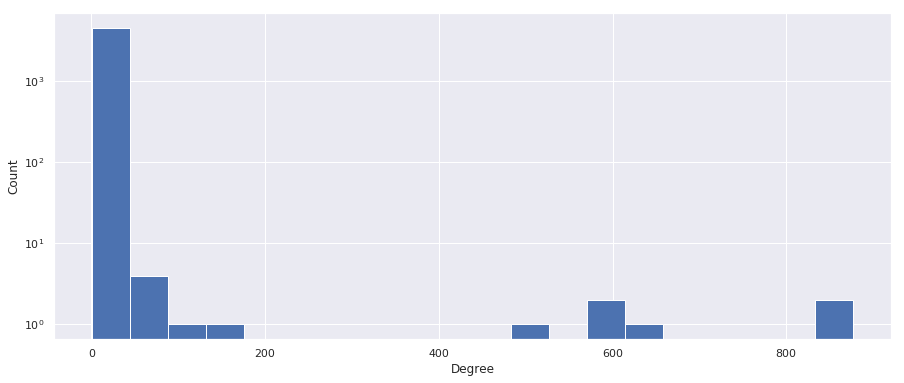

Empirical Degree Distribution for network: 


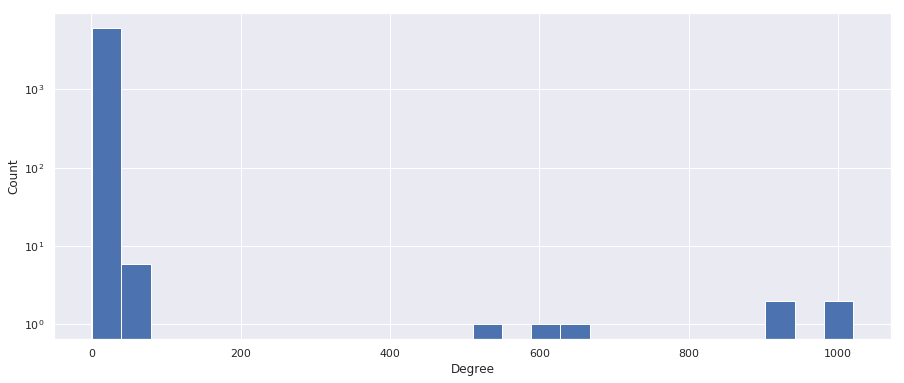

Empirical Degree Distribution for network: 


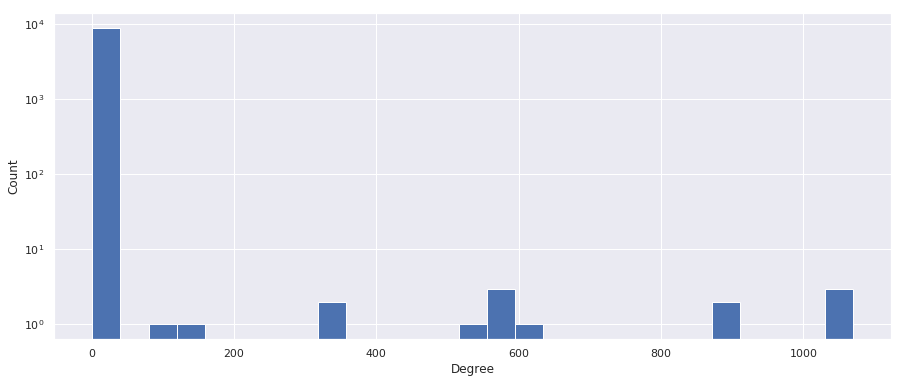

Empirical Degree Distribution for network: 


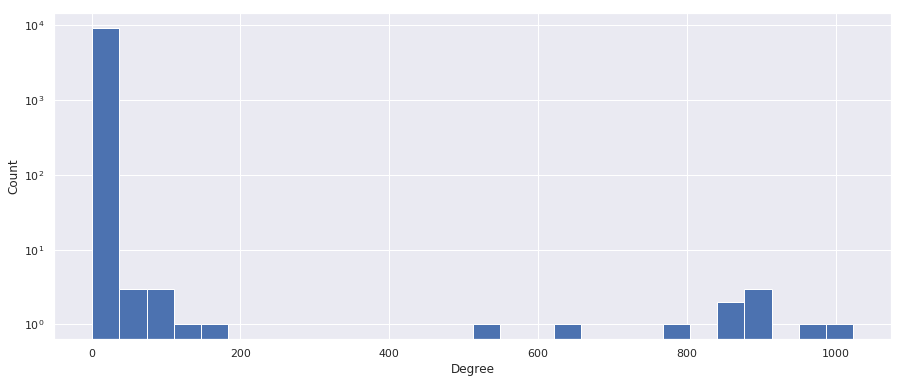

Empirical Degree Distribution for network: 


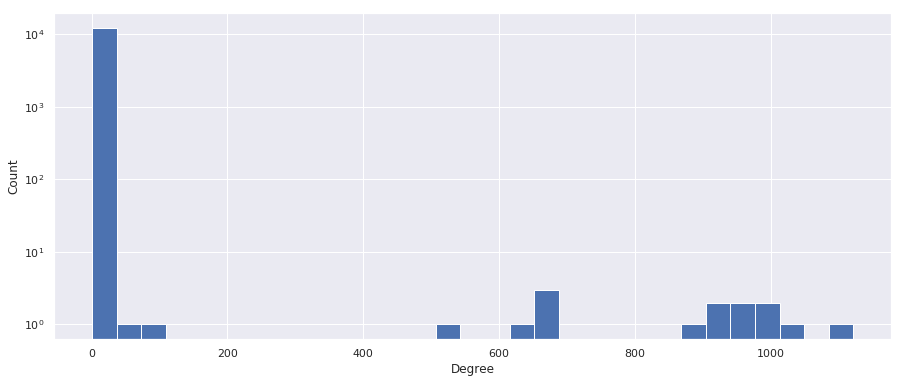

Empirical Degree Distribution for network: 


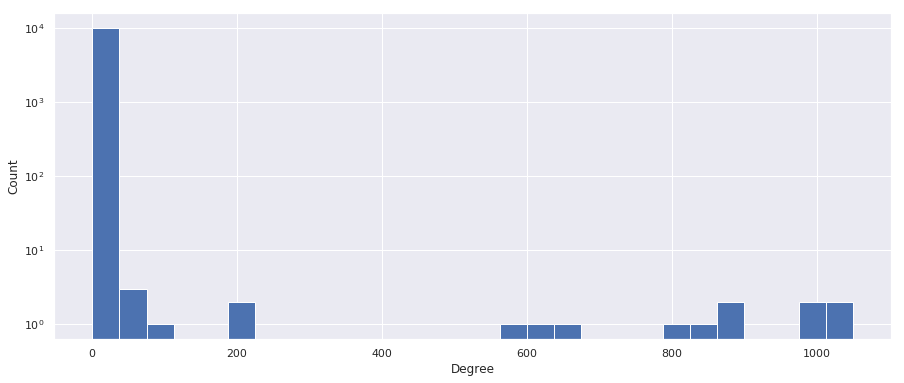

Empirical Degree Distribution for network: 


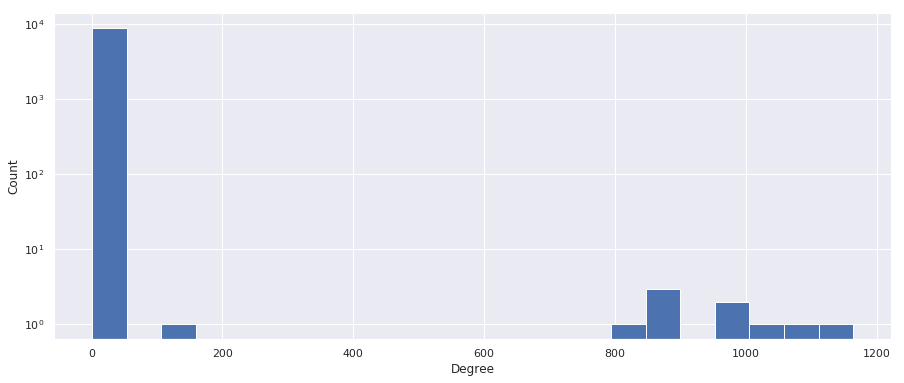

Empirical Degree Distribution for network: 


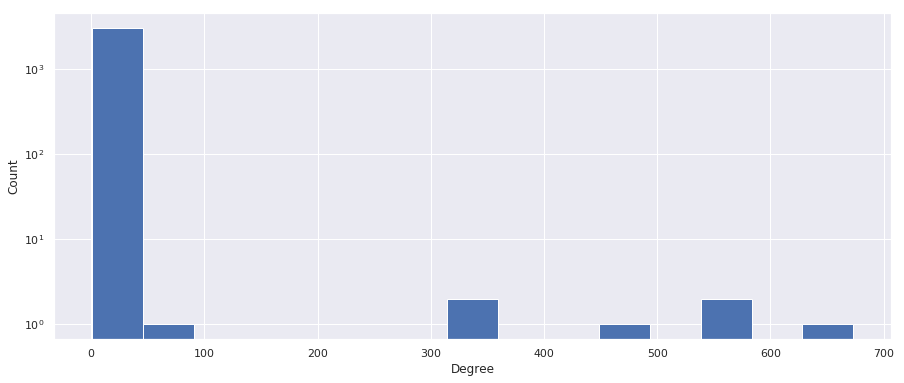

Empirical Degree Distribution for network: 


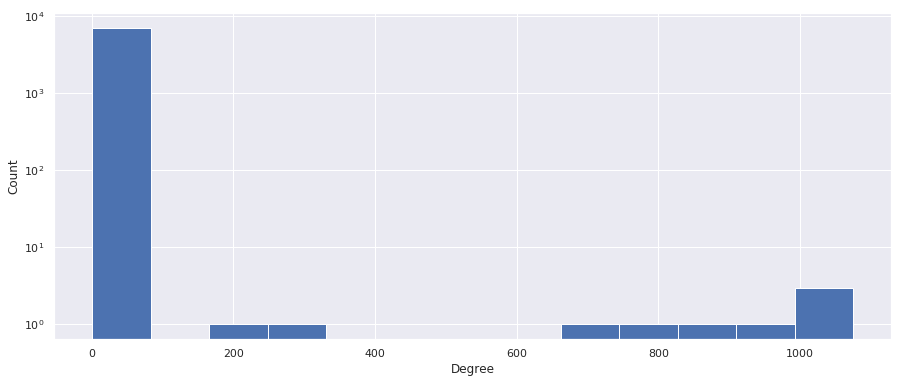

[None, None, None, None, None, None, None, None, None, None]

In [46]:
[print_degree_dist(g,0,1) for g in G_GCC]